<a href="https://colab.research.google.com/github/RLAshish/OIBSIP_DataScience_Task-2/blob/main/Task_2_Unemployment_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas matplotlib seaborn


Importing Libraries & Loading the Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Unemployment in India.csv")


Initial Data Exploration

In [ ]:
print("Shape of Dataset:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())


Shape of Dataset: (768, 7)

Column Names: ['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Area']

Data Types:
 Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

First 5 rows:
            Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra 

Cleaning & Preprocessing

In [ ]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop missing values from essential columns
df.dropna(subset=["Region", "Date", "Estimated Unemployment Rate (%)"], inplace=True)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Display the date range
print("\nDate Range:", df['Date'].min(), "to", df['Date'].max())



Missing Values:
 Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

Date Range: 2019-05-31 00:00:00 to 2020-06-30 00:00:00


<ipython-input-7-2007860480>:11: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Descriptive Statistics & Overview

In [ ]:
print("\nStatistical Summary:\n", df.describe())
print("\nUnique Regions:\n", df['Region'].unique())
print("\nData count per Region:\n", df['Region'].value_counts())



Statistical Summary:
                                 Date  Estimated Unemployment Rate (%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       Estimated Employed  Estimated Labour Participation Rate (%)  
count        7.400000e+02                               740.000000  
mean         7.204460e+06                                42.630122  
min          4.942000e+04                                13.330000  
25%          1.190404e+06                  

In [ ]:
sns.set(style="whitegrid")


National Unemployment Trend Over Time

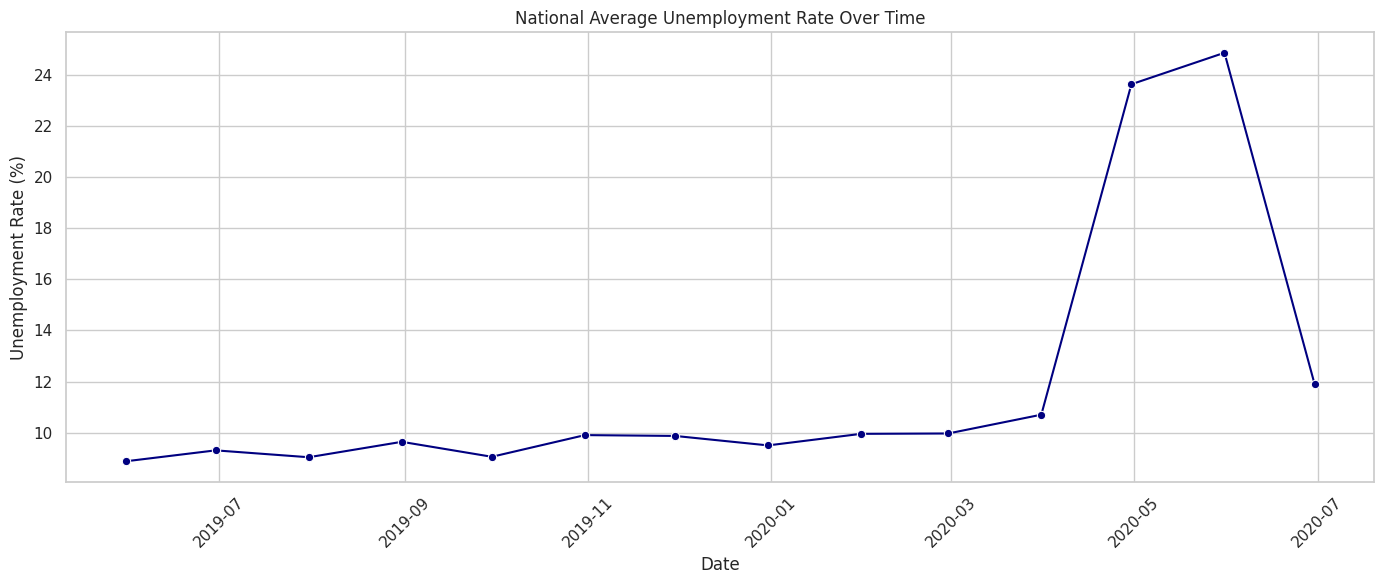

In [ ]:
plt.figure(figsize=(14, 6))
national_avg = df.groupby('Date')["Estimated Unemployment Rate (%)"].mean().reset_index()
sns.lineplot(data=national_avg, x="Date", y="Estimated Unemployment Rate (%)", marker="o", color='navy')
plt.title("National Average Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Average Unemployment Rate by Region

<ipython-input-11-2307628032>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.values, y=region_avg.index, palette="coolwarm")


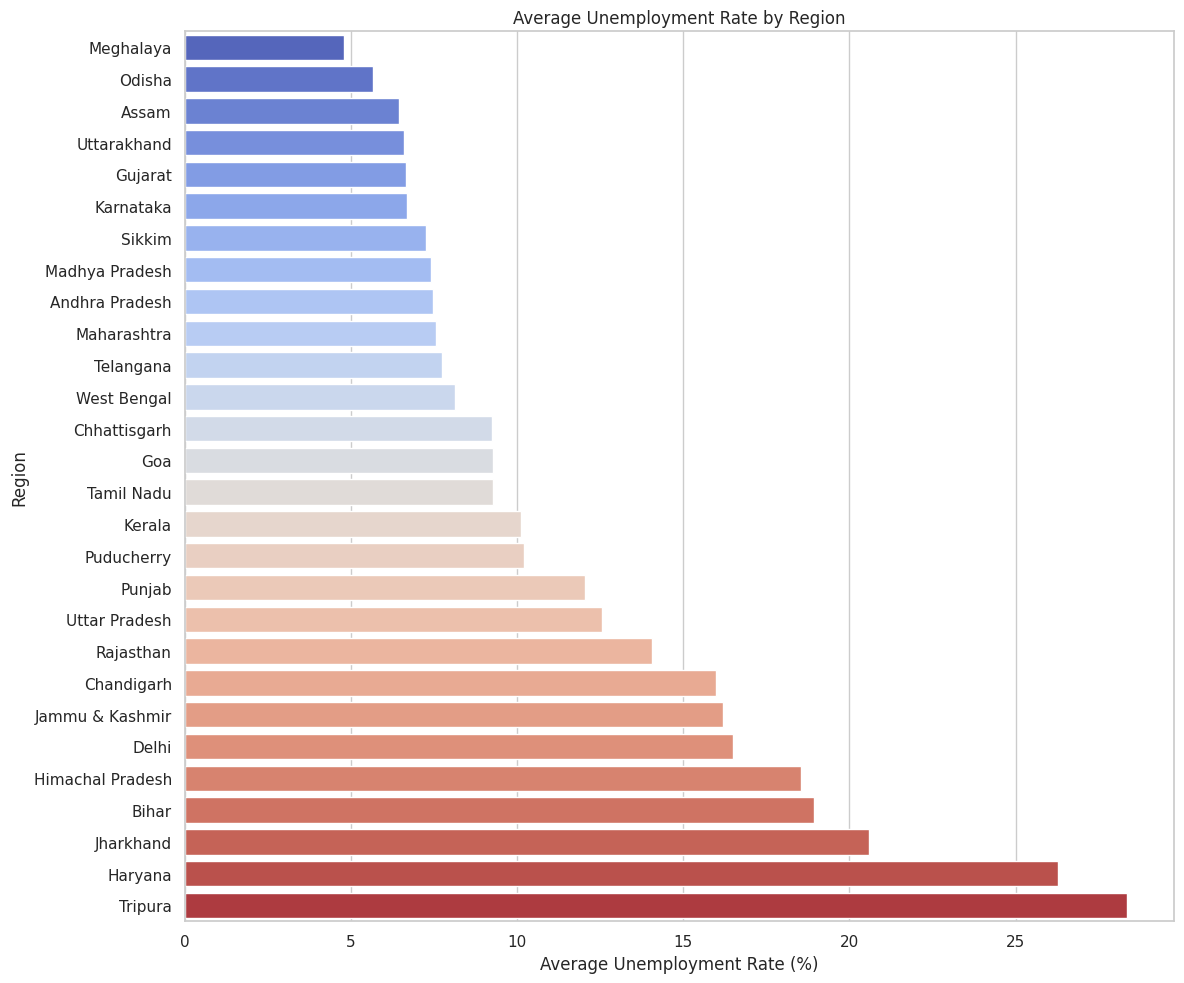

In [ ]:
plt.figure(figsize=(12, 10))
region_avg = df.groupby('Region')["Estimated Unemployment Rate (%)"].mean().sort_values()
sns.barplot(x=region_avg.values, y=region_avg.index, palette="coolwarm")
plt.title("Average Unemployment Rate by Region")
plt.xlabel("Average Unemployment Rate (%)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


Outlier Detection: Boxplot

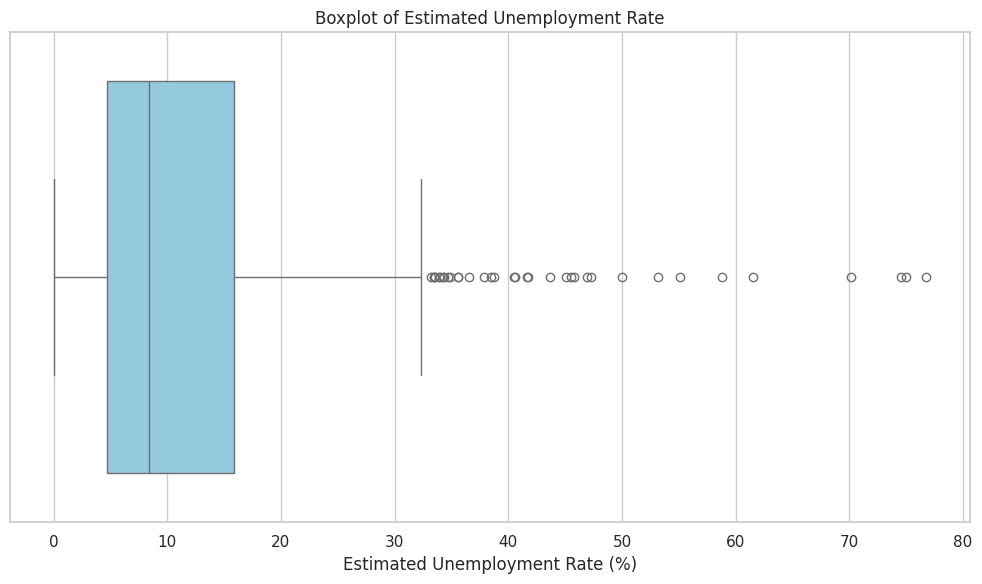

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Estimated Unemployment Rate (%)", color='skyblue')
plt.title("Boxplot of Estimated Unemployment Rate")
plt.tight_layout()
plt.show()


Distribution of Unemployment Rates

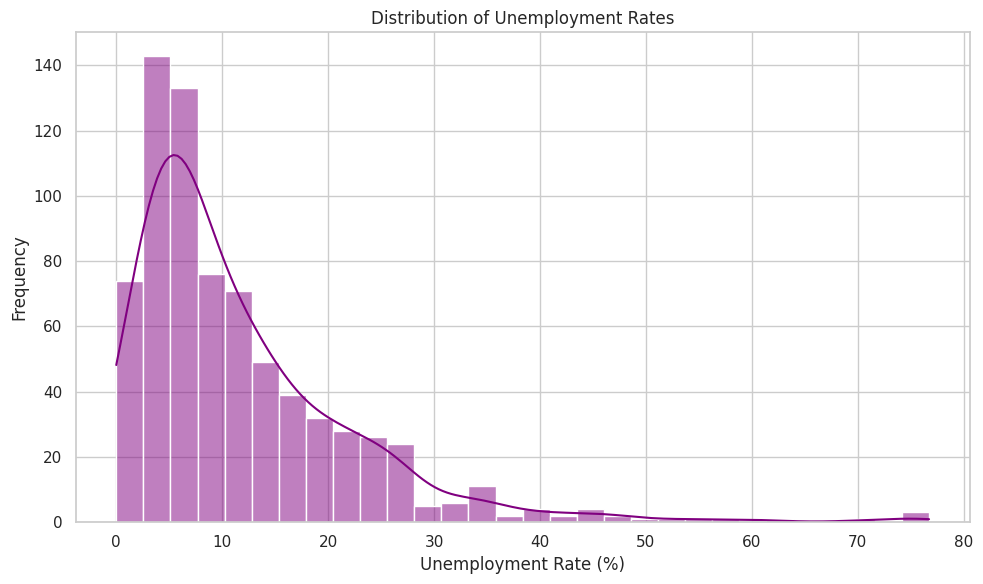

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Estimated Unemployment Rate (%)"], kde=True, bins=30, color='purple')
plt.title("Distribution of Unemployment Rates")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


Region-wise Unemployment Trends Over Time

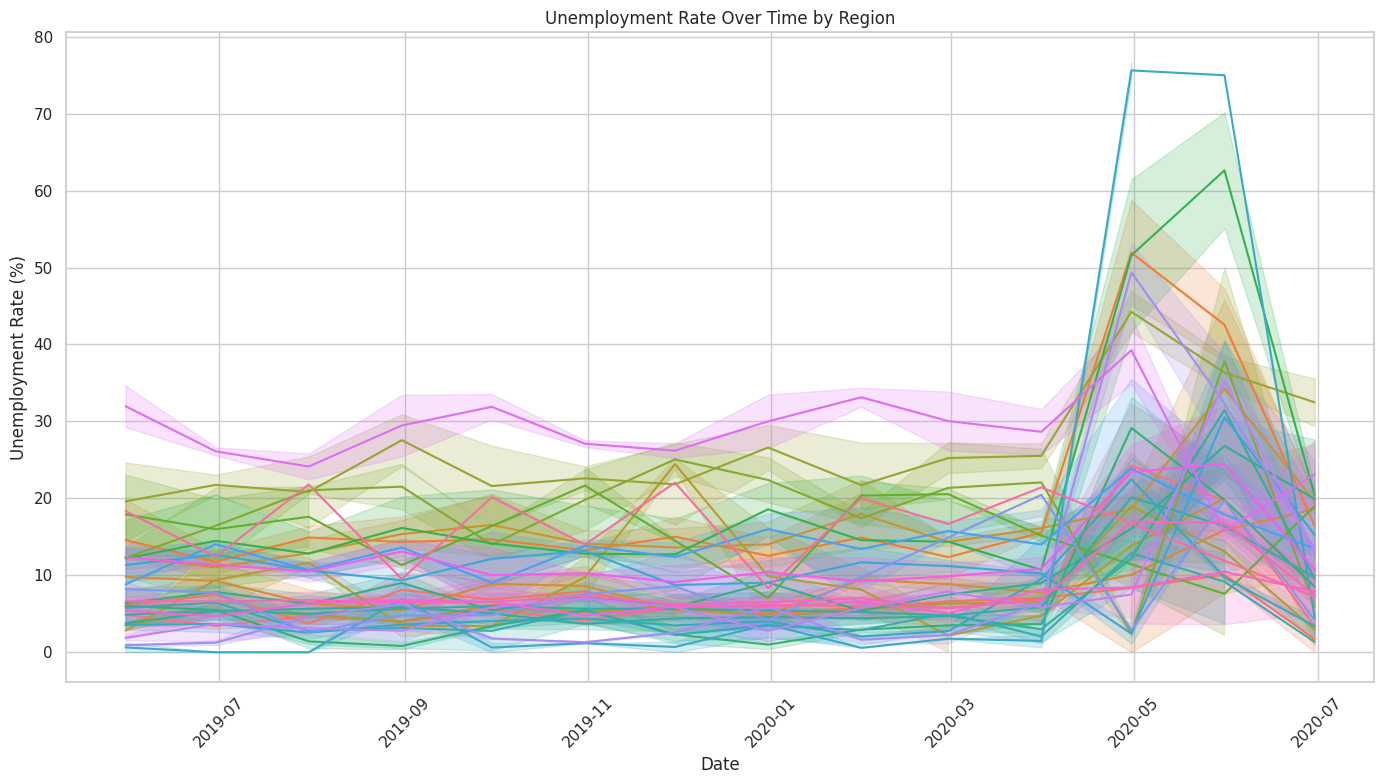

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x="Date", y="Estimated Unemployment Rate (%)", hue="Region", legend=False)
plt.title("Unemployment Rate Over Time by Region")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Correlation Heatmap

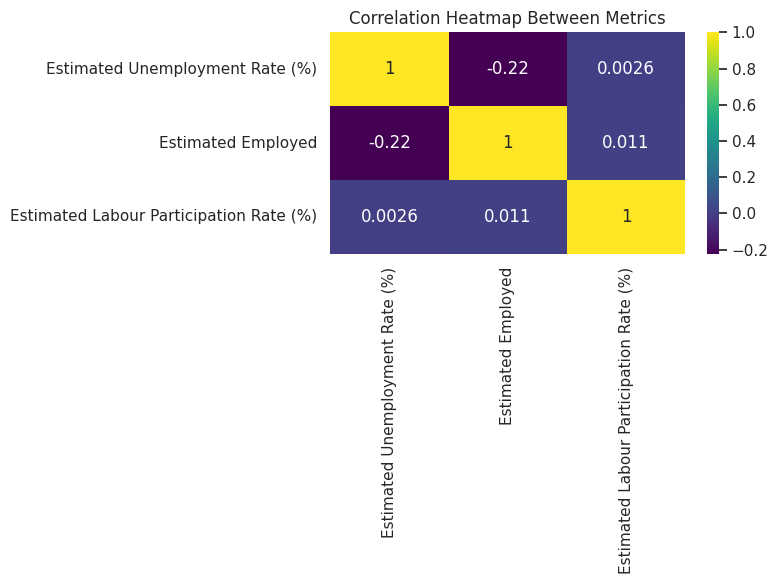

In [ ]:
plt.figure(figsize=(8, 6))
corr = df[[
    "Estimated Unemployment Rate (%)",
    "Estimated Employed",
    "Estimated Labour Participation Rate (%)"
]].corr()
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title("Correlation Heatmap Between Metrics")
plt.tight_layout()
plt.show()
